In [10]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# which method was best per precinct
voters = pd.read_csv("cleaned_nov_votes.csv")
text_outreach = pd.read_csv("contact methods/TextBanking_Efforts.xlsx - Attempts.csv")
walk_outreach = pd.read_csv("contact methods/total_walk.csv")

# list of voters contacted through phone
phone_outreach = pd.read_csv("contact methods/phone_contacts.csv")
phone_contacts = phone_outreach[phone_outreach["Contact Outcome"] == "Talking to Correct Person"]
phone_contacts.drop_duplicates()
phone_contacts.dropna()
phone_ids = phone_contacts["Voter ID"].values.tolist()

# list of voters contacted through text
text_contacts = pd.read_csv("contact methods/success_text_data.csv")
text_ids = text_contacts["Voter ID"].values.tolist()

# list of voters contacted through walks
walk_contacts = pd.read_csv("contact methods/canvassed_walk.csv")
walk_ids = walk_contacts["VoterID"].values.tolist()

# list of voters contacted through mail
# turnout dicts
phone_turnout = {}
text_turnout = {}
walk_turnout = {}
mail_turnout = {}

In [12]:
text_voters = voters[voters["Voter ID"].isin(text_ids)]
phone_voter_id = voters["Voter ID"].values.tolist()

phone_contacted_ids = []
for elem in phone_ids:
    if str(elem).isdigit():
        phone_contacted_ids.append(int(elem))

phone_voters = voters[voters["Voter ID"].isin(phone_contacted_ids)]
walk_voters = voters[voters["Voter ID"].isin(walk_ids)]
text_contact_conversion = text_voters.shape[0]/len(text_ids)
text_overall_conversion = text_voters.shape[0]/text_outreach.shape[0]

phone_contact_conversion = phone_voters.shape[0]/len(phone_contacted_ids)
phone_overall_conversion = phone_voters.shape[0]/phone_outreach.shape[0]

walk_contact_conversion = walk_voters.shape[0]/len(walk_ids)
walk_overall_conversion = walk_voters.shape[0]/walk_outreach.shape[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<AxesSubplot:title={'center':'Percentage of Contacted Who Voted vs Age'}, xlabel='age'>

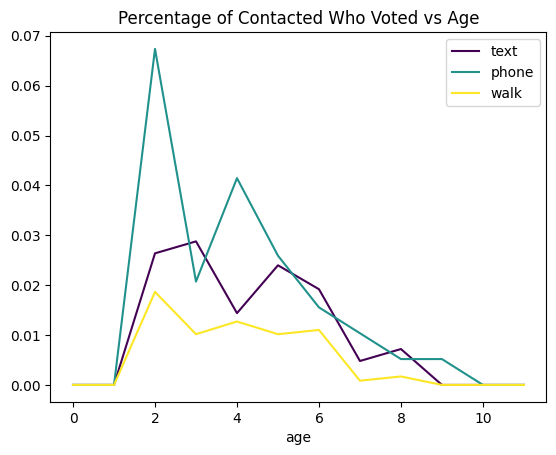

In [24]:
# best method per age:
# dict needs to be of form { age: [0, 1, 2], text: [4, 5, 6], door:[4, 5, 6], phone:}

ages = list(range(0, 12))
print(ages)
age_text = [0]*12
age_phone = [0]*12
age_walk = [0]*12
# update all the ages of text based voters
for idx, row in text_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_text[age] += 1

for idx, row in phone_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_phone[age] += 1

for idx, row in walk_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_walk[age] += 1

# Normalization might need some changes
for i in range(12):
    age_phone[i] /= len(phone_contacted_ids)
    age_text[i] /= len(text_ids)
    age_walk[i] /= len(walk_ids)

age_dict = {"age": ages, "text": age_text, "phone": age_phone, "walk": age_walk}
age_data = pd.DataFrame(age_dict)
age_data.plot(x="age", colormap = "viridis", title = "Percentage of Contacted Who Voted vs Age")
